In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *
from sklearn.datasets import make_classification

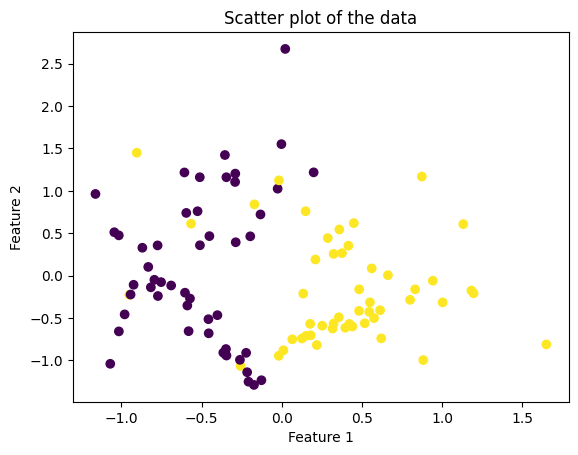

In [3]:
np.random.seed(42)

# Code given in the question
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=2, class_sep=0.5)

# For plotting
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter plot of the data')
plt.show()

In [4]:
 # Write the code for Q2 a) and b) below. Show your results.

df = pd.DataFrame(X, columns=[0, 1])
X_data = df.sample(frac=1, random_state=42).reset_index(drop=True)
y_target = pd.Series(y).sample(frac=1, random_state=42).reset_index(drop=True)

break_point = int(0.7 * len(X_data))
X_train = X_data.iloc[:break_point]
y_train = y_target.iloc[:break_point]
X_test = X_data.iloc[break_point:]
y_test = y_target.iloc[break_point:]

decision_tree = DecisionTree(criterion="information_gain")
decision_tree.fit(X_train, y_train,0)
predictions = decision_tree.predict(X_test)
print("Accuracy: ", accuracy(predictions, y_test))

for category in y_train.unique():
    print("Precision: ", precision(predictions, y_test, category))
    print("Recall: ", recall(predictions, y_test, category))

Accuracy:  0.43333333333333335
Precision:  1.0
Recall:  None
Precision:  0.41379310344827586
Recall:  None


In [5]:
#b

# 5 fold cross validation
Accuracies = []
fold_size = len(X_data) // 5
for i in range(5):
    test_start = i * fold_size
    test_end = (i + 1) * fold_size if i < 4 else len(X_data)
    X_train = pd.concat([X_data.iloc[:test_start], X_data.iloc[test_end:]])
    y_train = pd.concat([y_target.iloc[:test_start], y_target.iloc[test_end:]])
    X_test = X_data.iloc[test_start:test_end]
    y_test = y_target.iloc[test_start:test_end]
    decision_tree = DecisionTree(criterion="information_gain", max_depth=5)
    decision_tree.fit(X_train, y_train,0)
    predictions = decision_tree.predict(X_test)
    Accuracies.append(accuracy(predictions, y_test))

print("The Average accuracy from 5 fold cross validation is", np.mean(Accuracies))

The Average accuracy from 5 fold cross validation is 0.49000000000000005


In [6]:
# nested cross-validation for optimal depth

# Outer 5-fold cross validation
outer_fold_size = len(X_data) // 5
best_depths = []
outer_acc = []
for i in range(5):

    outer_test_start = i * outer_fold_size
    outer_test_end = (i + 1) * outer_fold_size if i < 4 else len(X_data)
    X_train = pd.concat([X_data.iloc[:outer_test_start], X_data.iloc[outer_test_end:]])
    y_train = pd.concat([y_target.iloc[:outer_test_start], y_target.iloc[outer_test_end:]])
    X_test = X_data.iloc[outer_test_start:outer_test_end]
    y_test = y_target.iloc[outer_test_start:outer_test_end]
    
    # inner 4 fold cross validation for hyperparameter
    inner_fold_size = len(X_train)//4
    highest_acc = 0

    # optimal depth
    for depth in range(1,10):
        inner_acc = []

        for j in range(4):
            inner_val_start = j * inner_fold_size
            inner_val_end = (j + 1) * inner_fold_size if j < 3 else len(X_train)
            X_inner_train = pd.concat([X_train.iloc[:inner_val_start], X_train.iloc[inner_val_end:]])
            y_inner_train = pd.concat([y_train.iloc[:inner_val_start], y_train.iloc[inner_val_end:]])
            X_inner_val = X_train.iloc[inner_val_start:inner_val_end]
            y_inner_val = y_train.iloc[inner_val_start:inner_val_end]

            decision_tree = DecisionTree(criterion="information_gain", max_depth=depth)
            decision_tree.fit(X_inner_train, y_inner_train,0)
            predictions = decision_tree.predict(X_inner_val)
            inner_acc.append(accuracy(predictions, y_inner_val))
        
        curr_acc = np.mean(inner_acc)
        if curr_acc > highest_acc :
            highest_acc = curr_acc
            best_depth = depth

    decision_tree_outer = DecisionTree(criterion="information_gain", max_depth=best_depth)
    decision_tree_outer.fit(X_train, y_train,0)
    predictions_outer = decision_tree_outer.predict(X_test)
    outer_acc.append(accuracy(predictions_outer, y_test))
        
    best_depths.append(best_depth)

print("The Average accuracy using nested cross-validation is", np.mean(outer_acc))
print("The optimal depth is", np.bincount(best_depths).argmax())


The Average accuracy using nested cross-validation is 0.48
The optimal depth is 2
